In [35]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing() 
m,n = housing.data.shape 
print (housing.keys())        #输出房价的key
print (housing.feature_names) #输出房价的特征：
print (housing.target)  
print (housing.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house val

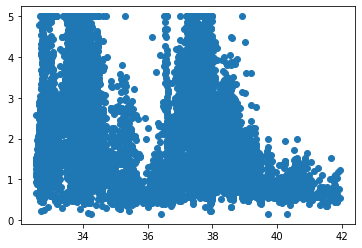

In [45]:
import matplotlib.pyplot as plt

x = housing.data[:,6]

y = housing.target
plt.scatter(x, y)
plt.show()

In [38]:
X = housing.data
y = housing.target

print(X.shape)

(20640, 8)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
y_train.shape

(13209,)

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_0_hat = lin_reg.predict(X_test[0].reshape(1, -1))
y_0_hat
y_test[0]

1.486

In [42]:
lin_reg.coef_
lin_reg.intercept_
train_score = lin_reg.score(X_train, y_train)
val_score = lin_reg.score(X_val,y_val)
test_score = lin_reg.score(X_test, y_test)
print('train_score:',train_score, 'val_score:',val_score,'test_score',test_score)

0.6072426844631583 0.5996717361930892 0.6058644339987234


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])
poly_reg.fit(X_train, y_train)
poly_train_score = poly_reg.score(X_train, y_train)
poly_val_score = poly_reg.score(X_val, y_val)
poly_test_score = poly_reg.score(X_test, y_test)
print('poly_train_score:',poly_train_score, 'poly_val_score:',poly_val_score,'poly_test_score',poly_test_score)

poly_train_score: 0.6973344319328862 poly_val_score: 0.6583448836211574 poly_test_score 0.5947398810946523


In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

poly_val_predict = poly_reg.predict(X_val)
poly_val_mae = mean_absolute_error(y_val, poly_val_predict)
poly_val_mse = mean_squared_error(y_val, poly_val_predict)
poly_test_predict = poly_reg.predict(X_test)
poly_test_mae = mean_absolute_error(y_test, poly_test_predict)
poly_test_mse = mean_squared_error(y_test, poly_test_predict)
print('poly_val_mae', poly_val_mae, 'poly_test_mae',poly_test_mae)
print('poly_val_mse', poly_val_mse, 'poly_test_mse',poly_test_mse)

poly_val_mae 0.46786377128345563 poly_test_mae 0.479278115444129
poly_val_mse 0.45501381559466025 poly_test_mse 0.5455687862967139


# 模型评估
### 偏执和方差也不是很大
